In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import stats
import json
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import joblib

In [145]:
regions = ["New England", "Mid Atlantic", "South", "Midwest", "Southwest", "West"]

In [147]:
new_england_df = pd.read_csv("../data/cleaned_new_england_covid.csv")
mid_atlantic_df = pd.read_csv("../data/cleaned_mid_atlantic_covid.csv")
south_df = pd.read_csv("../data/cleaned_south_covid.csv")
midwest_df = pd.read_csv("../data/cleaned_midwest_covid.csv")
southwest_df = pd.read_csv("../data/cleaned_southwest_covid.csv")
west_df = pd.read_csv("../data/cleaned_west_covid.csv")

In [149]:
def set_indexes(dfs):
    for df in dfs:
        df["date"] = pd.to_datetime(df["date"])
        df.set_index("date", inplace=True)
        df = df.sort_index()

In [151]:
set_indexes([new_england_df, mid_atlantic_df, south_df, midwest_df, southwest_df, west_df])

In [153]:
# load lasso coefs
with open('../data/coefs_region.json') as json_file:
    coefs = json.load(json_file)

In [155]:
region_features = {}
for region in coefs.keys():
    region_features[region] = list(coefs[region].keys())

In [157]:
dfs_region_map = {
    "New England": new_england_df,
    "Mid Atlantic": mid_atlantic_df,
    "South": south_df,
    "Midwest": midwest_df,
    "Southwest": southwest_df,
    "West": west_df
}

In [518]:
def get_accuracies_model_and_predictions(dfs_region_map, coefs):
    best_accs_region = {}
    for region in dfs_region_map.keys():
        df = dfs_region_map[region]
        X = df.groupby("date").mean(numeric_only=True)[coefs[region]]
        y = df.groupby("date").mean(numeric_only=True)["critical_staffing_shortage_today_yes"]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
        LR_model = LinearRegression()
        LR_model.fit(X_train, y_train)
        test_accuracyLR = LR_model.score(X_test, y_test)
        predictions = LR_model.predict(X_test)
        best_accs_region[region] = test_accuracyLR, X_test, predictions

    return best_accs_region

In [545]:
accs_region = get_accuracies_model_and_predictions(dfs_region_map, region_features)
{k:v[0] for k,v in accs_region.items()}

{'New England': 0.9625530812132546,
 'Mid Atlantic': 0.9154201931986359,
 'South': 0.9695122436174112,
 'Midwest': 0.985157514440196,
 'Southwest': 0.9931344736885652,
 'West': 0.9728233027232137}

In [526]:
new_england_score, ne_X_test, ne_predictions = accs_region["New England"]

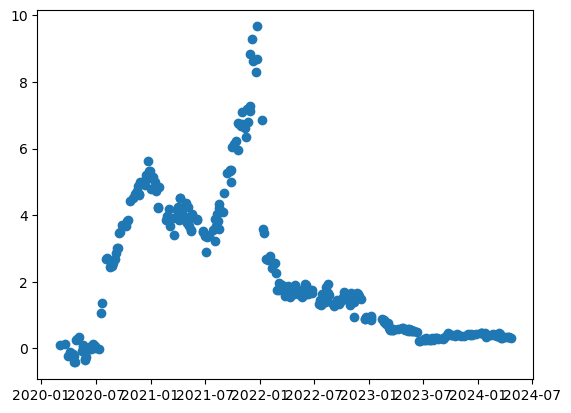

In [538]:
plt.figure()
plt.scatter(ne_X_test.index, ne_predictions)
plt.show()